In [990]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [991]:
df = pd.read_csv('../data/processed/telco_cleaned.csv')

In [992]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [993]:
print("Jumlah baris dan Kolom:", df.shape)
print("Kolom yang ada pada dataset:\n", df.columns)
print("Sampel data:")
display(df.head(5))

Jumlah baris dan Kolom: (7043, 20)
Kolom yang ada pada dataset:
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Sampel data:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [994]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [995]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6534
Churn                  2
dtype: int64

## Menghitung Churn Rate

In [996]:
churnN = df['Churn'] == 'No'
churnY = df['Churn'] == 'Yes'

print("Jumlah pengguna tidak Churn: ", churnN.sum())
print("Jumlah pengguna Churn: ", churnY.sum()) 

churn_rate = churnY.sum() / (churnN.sum() + churnY.sum())
print("Churn Rate: ", str(churn_rate.round(2)))

Jumlah pengguna tidak Churn:  5174
Jumlah pengguna Churn:  1869
Churn Rate:  0.27


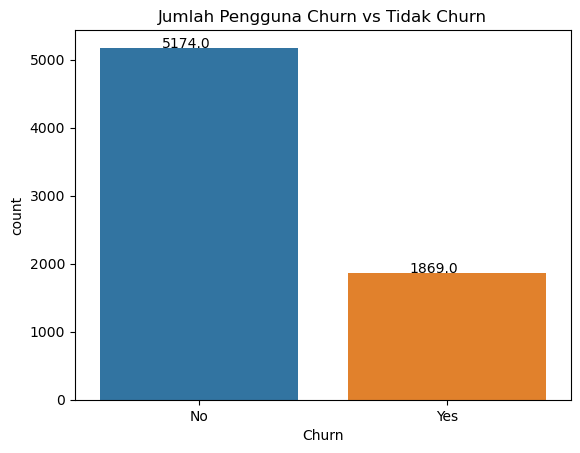

In [997]:
ax = sns.countplot(x='Churn', data=df, hue = 'Churn')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn vs Tidak Churn')

plt.show()

In [998]:
churnNCharges = df[ df['Churn'] == 'No']['TotalCharges'].sum()

churnYCharges = df[ df['Churn'] == 'Yes']['TotalCharges'].sum()

print("Total Charges untuk pengguna tidak Churn: ", churnNCharges)
print("Total Charges untuk pengguna Churn: ", churnYCharges)
churnChargesRate = churnYCharges / (churnNCharges + churnYCharges)
print("Churn Charges Rate: ", churnChargesRate)


Total Charges untuk pengguna tidak Churn:  13193697.399999999
Total Charges untuk pengguna Churn:  2862926.9
Churn Charges Rate:  0.17830191742108584


  Churn  TotalCharges
0    No    13193697.4
1   Yes     2862926.9


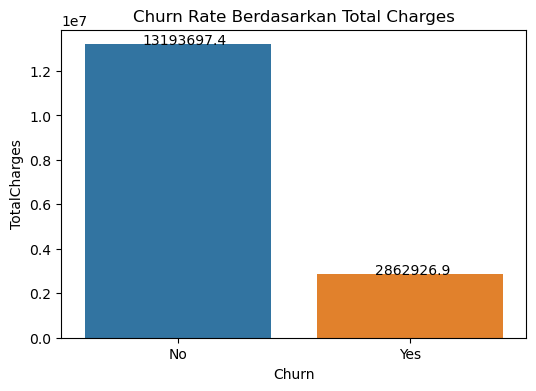

In [999]:
df_charges = df.groupby('Churn')['TotalCharges'].sum().reset_index()
print(df_charges)

plt.figure(figsize=(6,4))
ax = sns.barplot(x = 'Churn', y='TotalCharges', data = df_charges, hue = 'Churn')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Churn Rate Berdasarkan Total Charges')
plt.show()

## Hubungan antara Churn dan Demografi

In [1000]:
demographic_columns = df.loc[df['Churn'] == 'Yes', ['gender', 'SeniorCitizen', 'Partner', 'Dependents']]
demographic_columns.head()

,gender,SeniorCitizen,Partner,Dependents
2,Male,0,No,No
4,Female,0,No,No
5,Female,0,No,No
8,Female,0,Yes,No
13,Male,0,No,No


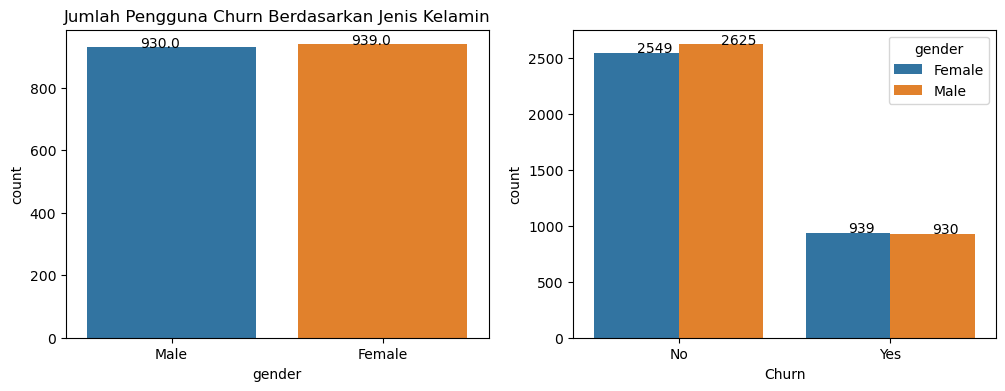

In [1001]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'gender', data = demographic_columns, hue = 'gender')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Jenis Kelamin')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'gender')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height() + 0.01))


plt.show()

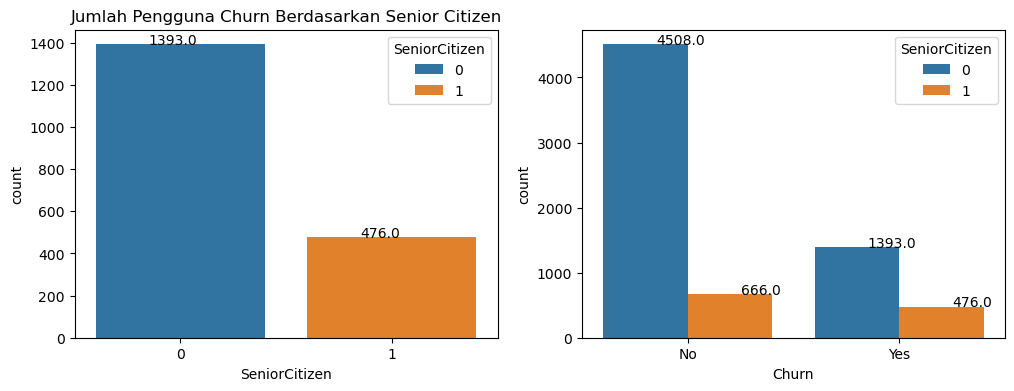

In [1002]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'SeniorCitizen', hue = 'SeniorCitizen', data = demographic_columns)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Senior Citizen')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'SeniorCitizen')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))


plt.show()

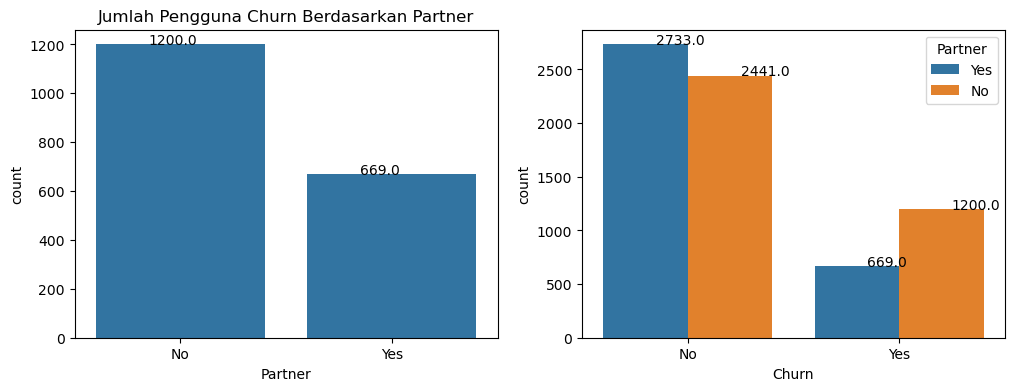

In [1003]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'Partner', data = demographic_columns, order = ['No', 'Yes'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Partner')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'Partner', order = ['No', 'Yes'])

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))


plt.show()

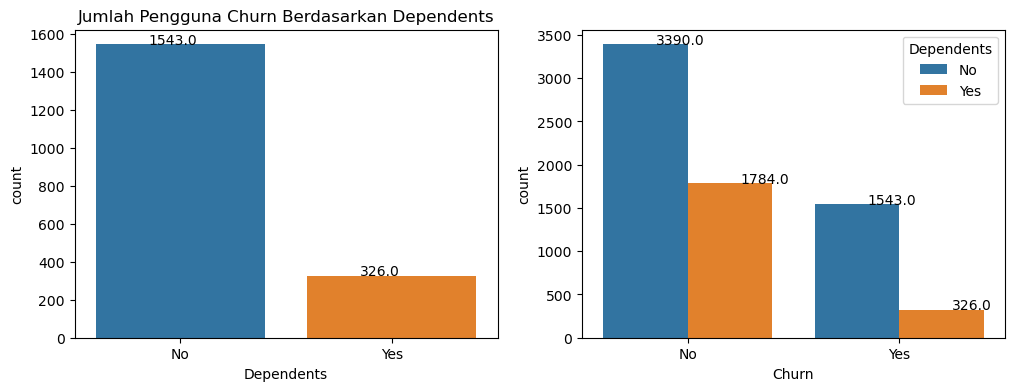

In [1004]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'Dependents', hue = 'Dependents', data = demographic_columns, order = ['No', 'Yes'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Dependents')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'Dependents')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

plt.show()

## Hubungan antara Churn dan Demografi:  
Pengguna yang churn tidak ada perbedaan besar antara pria atau wanita, sebagian besar yang churn bukan warga negara senior, hampir setengah dari pelanggan yang churn tidak memiliki partner, dan sebagian besar yang churn tidak memiliki tanggungan.

## Hubungan antara Churn dan Service

In [1005]:
services = df.loc[df['Churn'] == 'Yes', ['PhoneService','MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
services.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2,Yes,No,DSL,Yes,Yes,No,No,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,No
5,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
8,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
13,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes


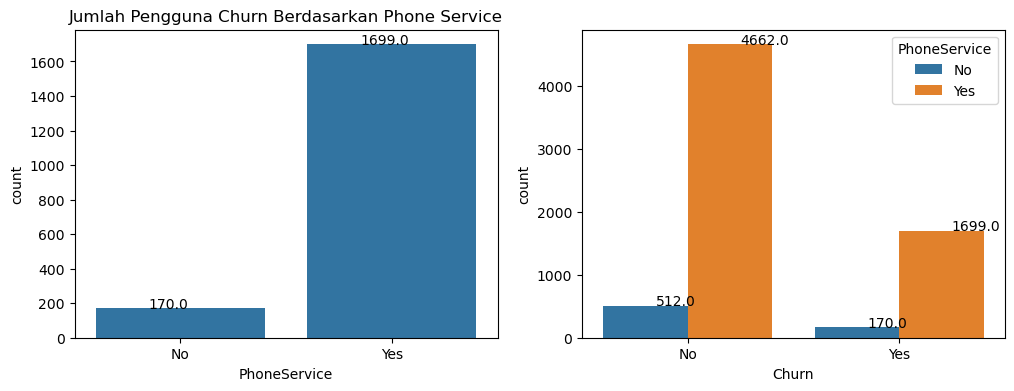

In [1006]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'PhoneService', data = services, order = ['No', 'Yes'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Phone Service')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'PhoneService')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))


plt.show()

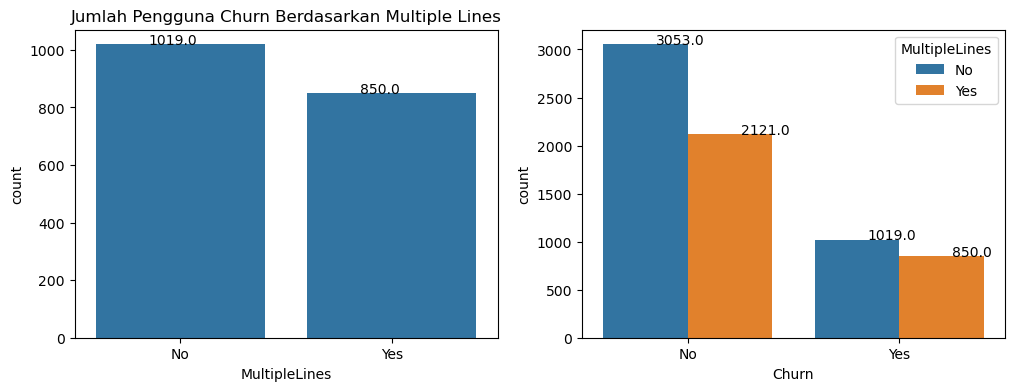

In [1007]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'MultipleLines', data = services, order = ['No', 'Yes'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Multiple Lines')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'MultipleLines')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))


plt.show()

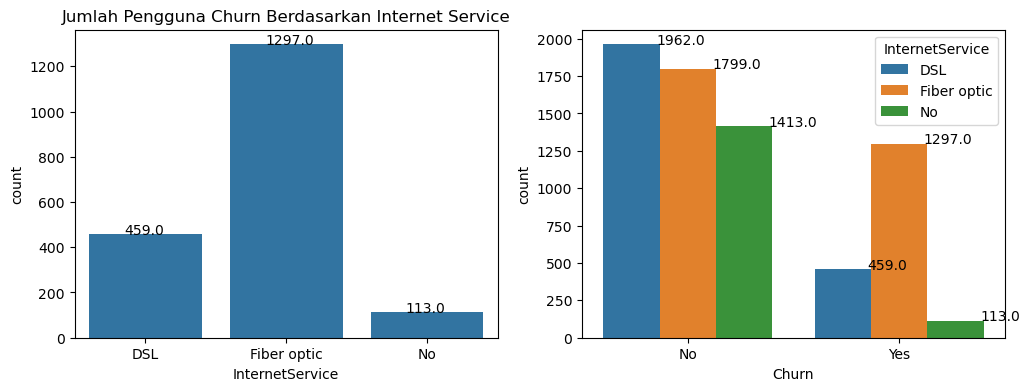

In [1008]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'InternetService', data = services)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Internet Service')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'InternetService')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))


plt.show()

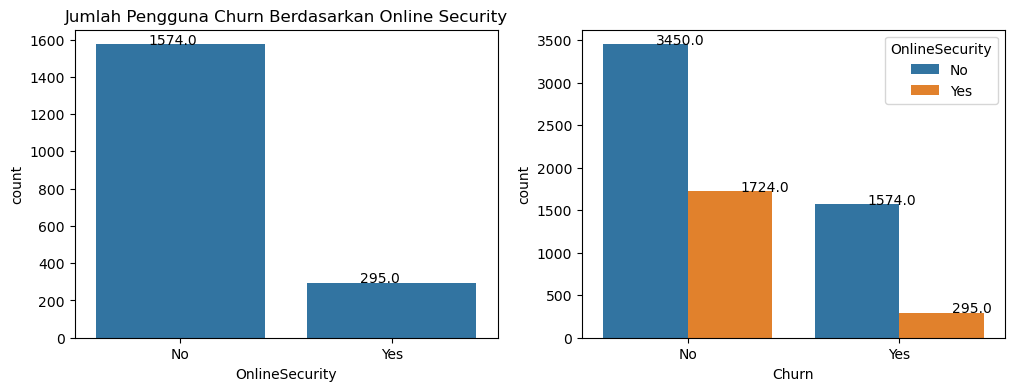

In [1009]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'OnlineSecurity', data = services, order = ['No', 'Yes'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Online Security')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'OnlineSecurity')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))


plt.show()

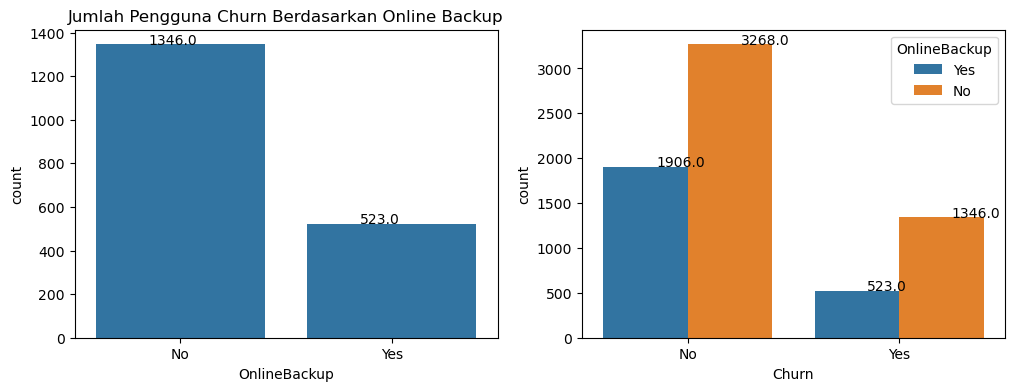

In [1010]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'OnlineBackup', data = services, order = ['No', 'Yes'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Online Backup')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'OnlineBackup')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))


plt.show()

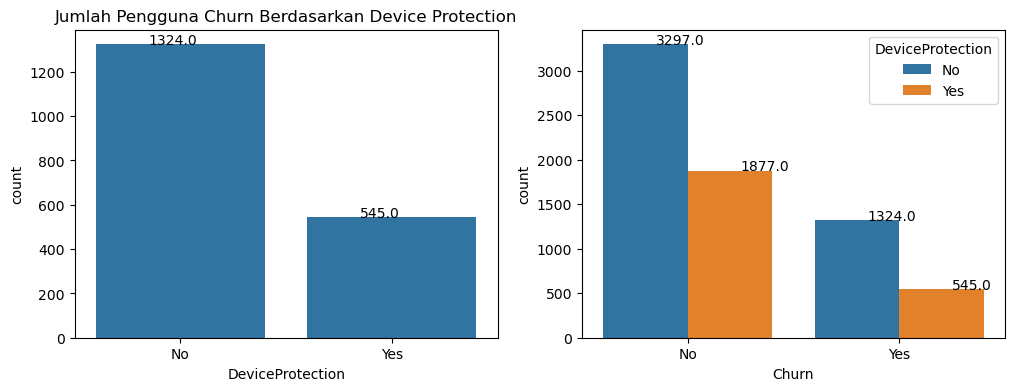

In [1011]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'DeviceProtection', data = services)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Device Protection')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'DeviceProtection')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))


plt.show()

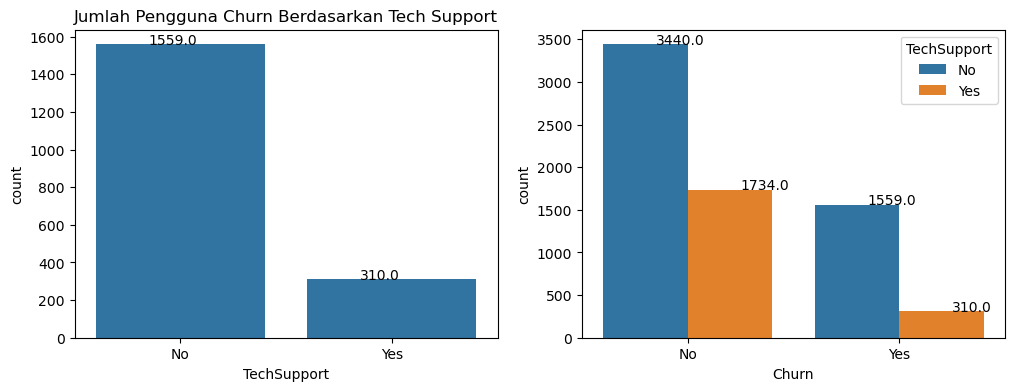

In [1012]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'TechSupport', data = services)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Tech Support')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'TechSupport')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))


plt.show()

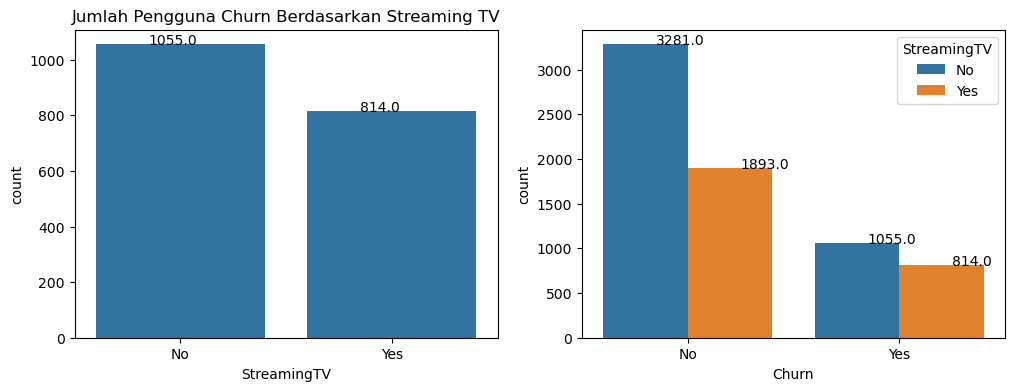

In [1013]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'StreamingTV', data = services)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Streaming TV')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'StreamingTV')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))


plt.show()

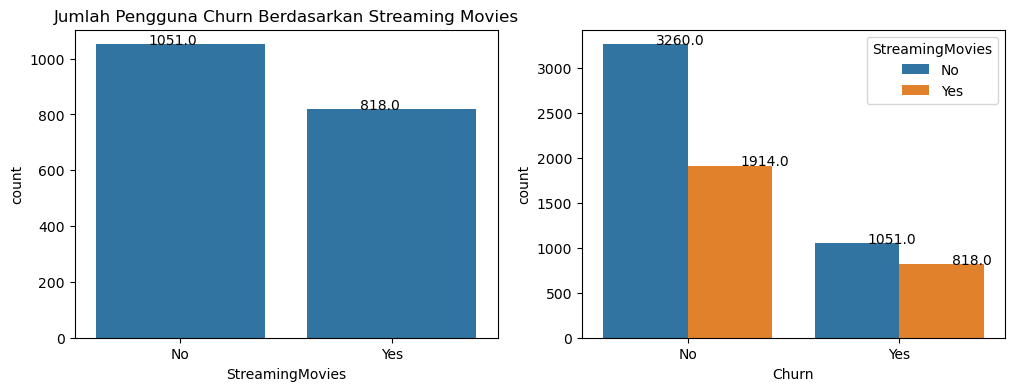

In [1014]:
plt.figure(figsize=(12, 4))
ax = plt.subplot (121)
ax = sns.countplot (x = 'StreamingMovies', data = services)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Streaming Movies')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'StreamingMovies')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))


plt.show()

## Hubungan antara churn dan service:  
* Mayoritas menggunakan Phone Service  
* Tidak ada perbedaan yang signifikan pada pelanggan yang menggunakan Multiple Lines  
* Mayoritas menggunakan Fibre optic internet  
* Mayoritas tanpa Online security   
* Mayoritas tanpa Online Backup   
* Mayoritas tanpa Device protection     
* Tidak ada perbedaan yang signifikan pada pelanggan yang menggunakan streaming TV  
* Tidak ada perbedaan yang signifikan pada pelanggan yang menggunakan streaming movies   

Sebagian besar pelanggan yang berpindah hanya mendaftar sebagai pengguna layanan saja, tetapi tidak menggunakan layanan tambahan dari operator telekomunikasi mereka seperti Tech Support, Online Security, Online Backup, dan Device Protection. Oleh karena itu hanya ada sedikit keterikatan.

## Hubungan antara Churn dan Customer

In [1015]:
cust = df.loc[df['Churn'] == 'Yes', ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]
cust.head()

,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
2,2,Month-to-month,Yes,Mailed check,53.85
4,2,Month-to-month,Yes,Electronic check,70.70
5,8,Month-to-month,Yes,Electronic check,99.65
8,28,Month-to-month,Yes,Electronic check,104.80
13,49,Month-to-month,Yes,Bank transfer (automatic),103.70


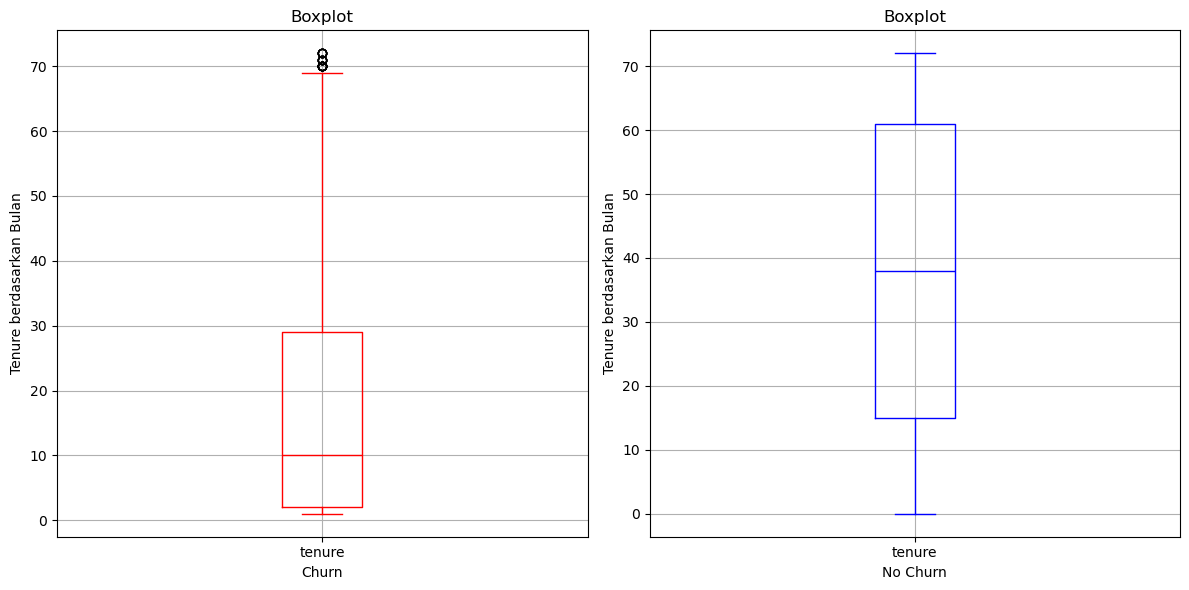

In [1016]:
custtetap = df.loc[df['Churn'] == 'No', ['tenure', 'MonthlyCharges']]

dist1 = cust['tenure']
dist2 = custtetap['tenure']

fig = plt.figure(figsize=(12, 6))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

dist1.plot(kind='box', color = 'red', vert = True, ax=ax0, grid=True)
ax0.set_title('Boxplot')
ax0.set_xlabel('Churn')
ax0.set_ylabel('Tenure berdasarkan Bulan')

dist2.plot(kind='box', color = 'blue', vert = True, ax=ax1, grid=True)
ax1.set_title('Boxplot')
ax1.set_xlabel('No Churn')
ax1.set_ylabel('Tenure berdasarkan Bulan')

plt.tight_layout()
plt.show()

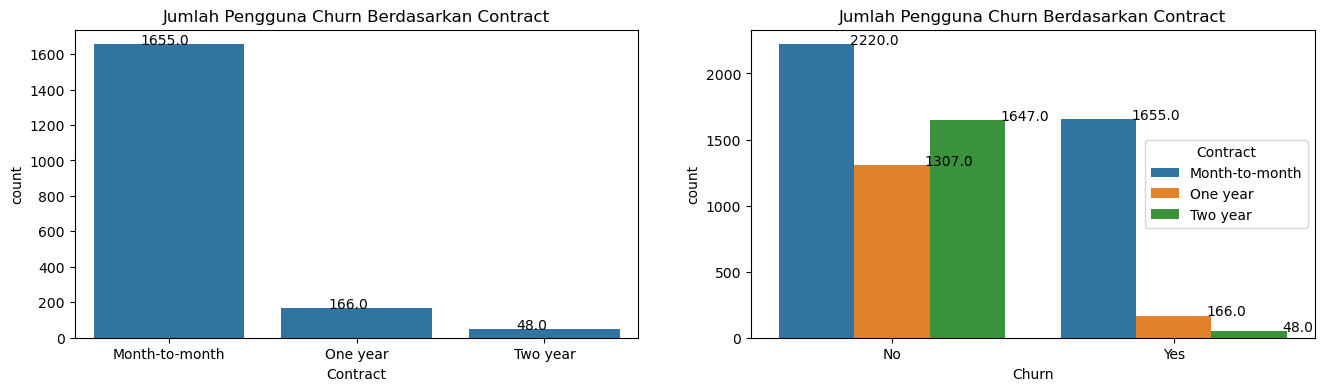

In [1017]:
plt.figure(figsize=(16, 4))

ax = plt.subplot (121)
ax = sns.countplot (x = 'Contract', data = cust, order = ['Month-to-month', 'One year', 'Two year'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Contract')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'Contract')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Contract')

plt.show()

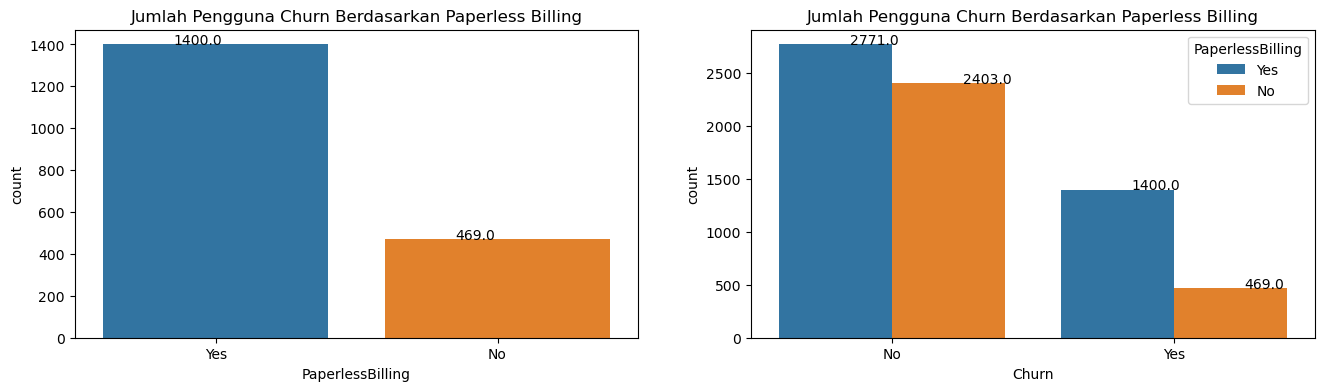

In [1018]:
plt.figure(figsize=(16, 4))

ax = plt.subplot (121)
ax = sns.countplot (x = 'PaperlessBilling', data = cust, hue = 'PaperlessBilling')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Paperless Billing')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'PaperlessBilling')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Paperless Billing')

plt.show()

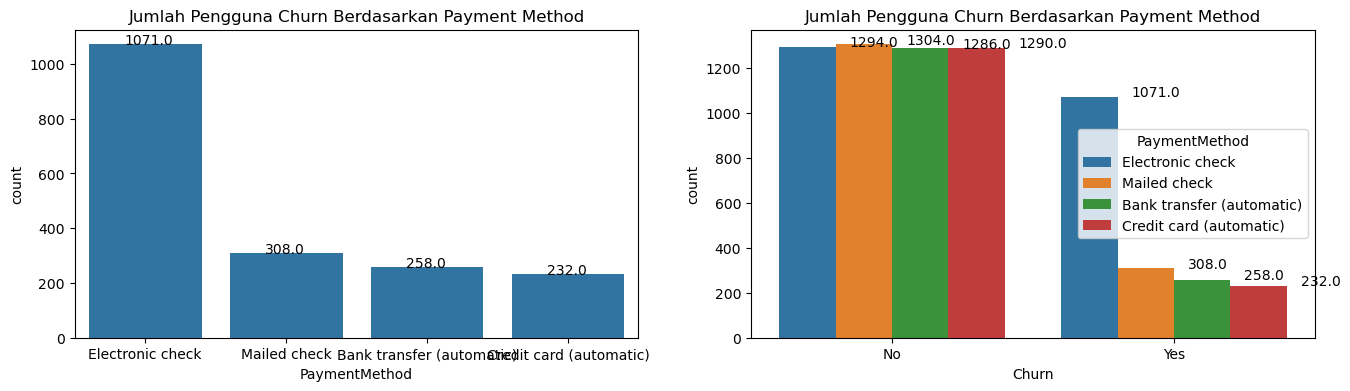

In [1019]:
plt.figure(figsize=(16, 4))

ax = plt.subplot (121)
ax = sns.countplot (x = 'PaymentMethod', data = cust, order = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Payment Method')

ax = plt.subplot (122)
ax = sns.countplot (x = 'Churn', data = df, hue = 'PaymentMethod')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Jumlah Pengguna Churn Berdasarkan Payment Method')

plt.show()

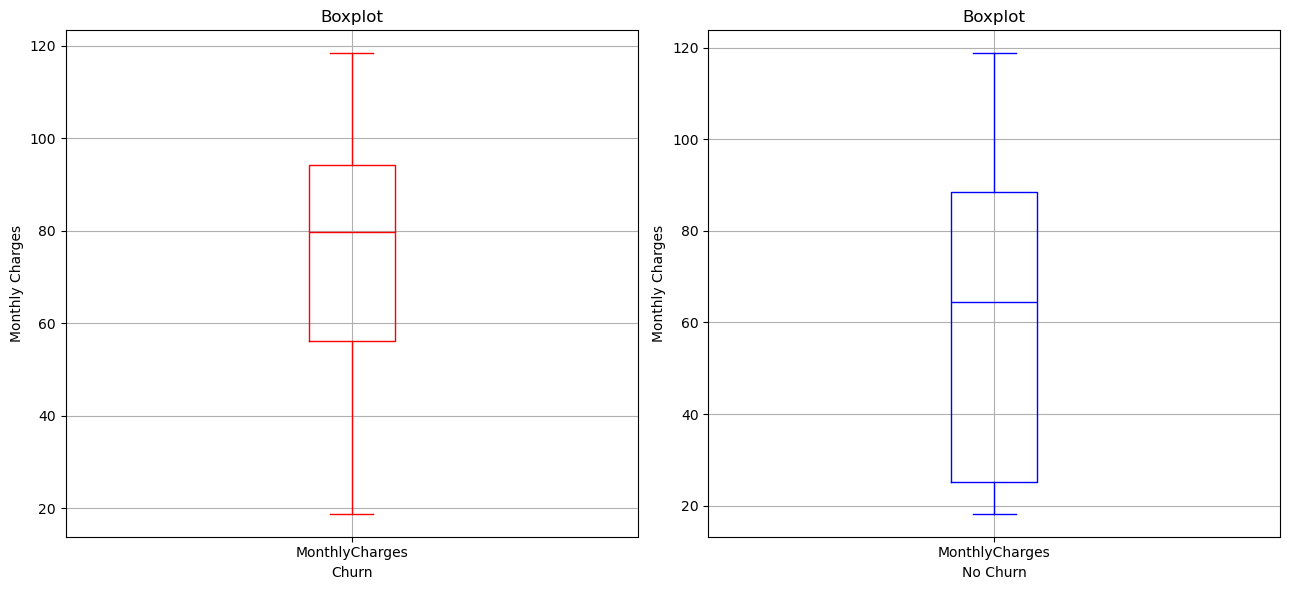

In [1020]:
fig = plt.figure(figsize=(13, 6))

dist1 = cust['MonthlyCharges']
dist2 = custtetap['MonthlyCharges']

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

dist1.plot(kind='box', color = 'red', vert = True, ax=ax0, grid=True)
ax0.set_title('Boxplot')
ax0.set_xlabel('Churn')
ax0.set_ylabel('Monthly Charges')

dist2.plot(kind='box', color = 'blue', vert = True, ax=ax1, grid=True)
ax1.set_title('Boxplot')
ax1.set_xlabel('No Churn')
ax1.set_ylabel('Monthly Charges')

plt.tight_layout()
plt.show()

## Hubungan antara Churn dan Customer  
* Mayoritas tenure kurang dari 15 bulan  
* Mayoritas Contract month-to-month  
* Mayoritas dengan Paperless billing  
* Mayoritas pelanggan Churn menggunakan Payment method electronic check  
* Mayoritas dengan Monthly charges pada kisaran $80 hingga $100  

Tampaknya sebagian besar pelanggan yang berpindah memiliki kontrak kurang dari 10 bulan. Mereka memiliki kontrak per bulan yang menawarkan sedikit insentif untuk churn, mayoritas memiliki Paperless billing dengan tagihan bulanan di kisaran 80 dibandingkan dengan mereka yang tidak melakukan churn yang sebagian besar membayar 62.


Menghitung korelasi antar fitur numerik...


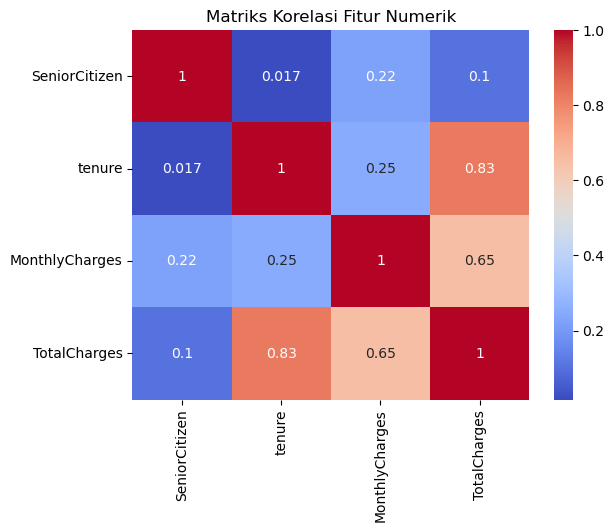

In [1021]:
print("\nMenghitung korelasi antar fitur numerik...")
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()


1. Hubungan Tenure dengan Variabel Lain

- Tenure vs TotalCharges (Korelasi: 0.83)
* Insight: Terdapat korelasi positif yang sangat kuat antara lama berlangganan dengan total biaya yang dibayarkan
* Business Implication: Pelanggan yang bertahan lebih lama menghasilkan revenue yang lebih tinggi untuk perusahaan
* Actionable: Fokus pada strategi retensi pelanggan untuk meningkatkan lifetime value

- Tenure vs SeniorCitizen (Korelasi: 0.017)
* Insight: Hampir tidak ada hubungan antara status senior citizen dengan lama berlangganan
* Business Implication: Usia tidak menjadi faktor penentu loyalitas pelanggan
* Actionable: Strategi retensi tidak perlu dibedakan berdasarkan usia

2. Pola Biaya Pelanggan

- MonthlyCharges vs TotalCharges (Korelasi: 0.65)
* Insight: Biaya bulanan memiliki pengaruh sedang-tinggi terhadap total biaya keseluruhan
* Business Implication: Pelanggan dengan biaya bulanan tinggi cenderung berkontribusi lebih besar pada total revenue
* Actionable: Pertimbangkan strategi upselling untuk meningkatkan monthly charges

- MonthlyCharges vs Tenure (Korelasi: 0.25)
* Insight: Korelasi lemah antara biaya bulanan dengan lama berlangganan
* Business Implication: Pelanggan dengan biaya tinggi tidak selalu bertahan lebih lama
* Actionable: Perlu analisis lebih lanjut tentang value perception pelanggan

3. Karakteristik Senior Citizen

- SeniorCitizen vs MonthlyCharges (Korelasi: 0.22)
* Insight: Senior citizen memiliki kecenderungan sedikit lebih tinggi untuk membayar biaya bulanan yang lebih besar
* Business Implication: Segmen senior mungkin lebih willing to pay untuk layanan premium
* Actionable: Kembangkan paket khusus senior dengan value proposition yang sesuai

- SeniorCitizen vs TotalCharges (Korelasi: 0.10)
* Insight: Hubungan yang sangat lemah antara status senior dengan total biaya
* Business Implication: Senior citizen tidak berkontribusi signifikan lebih tinggi pada total revenue
* Actionable: Evaluasi efektivitas strategi targeting senior citizen

4. Implikasi untuk Churn Analysis

- Tenure sebagai Predictor Utama
* Insight: Dengan korelasi tinggi terhadap TotalCharges, tenure kemungkinan menjadi indikator penting untuk churn
* Hypothesis: Pelanggan dengan tenure rendah lebih berisiko churn
* Next Step: Analisis distribusi tenure berdasarkan churn status

- Monthly Charges sebagai Risk Factor
* Insight: Korelasi sedang dengan total charges menunjukkan monthly charges bisa menjadi faktor churn
* Hypothesis: Pelanggan dengan monthly charges tinggi mungkin lebih sensitif terhadap price
* Next Step: Segmentasi pelanggan berdasarkan monthly charges dan churn rate

5. Key Takeaways untuk Business
* Retention is key: Korelasi tinggi tenure-total charges menunjukkan pentingnya customer retention
* Price strategy matters: Korelasi monthly charges dengan variabel lain menunjukkan pentingnya pricing strategy
* Age-neutral approach: Korelasi rendah senior citizen dengan variabel lain menunjukkan strategi tidak perlu terlalu fokus pada usia
* Long-term value focus: Pelanggan yang bertahan lama adalah yang paling valuable